© 2018 Suzy Beeler. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT) 

This exercise was generated from a Jupyter notebook. You can download the notebook [here](inferring_p_heads.ipynb).
___

# Objective 

This tutorial will serve as a brief introduction to Bayesian inference, a way in which was can estimate the probability of different parameters values from our data. As an example, we will work with a simulated coin, which has probability $0 \leq p \leq 1$ of revealing heads. 

# Bayes' Theorem

Bayes' Theorem is given by

$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)}, \tag{1}$$

where $A$ and $B$ are certain events that respectively have probability $P(A)$ and $P(B)$ of occurring. Additionally, $P(A|B)$ (read as "probability of $A$ given $B$") is defined as the probability that $A$ occurs *given* that event $B$ has already occurred. This is also known as a *conditional probability* since event $A$ is conditional on event $B$. In the context of scientific endeavors, we are interested in the probability that a model, $M$ (i.e. a given parameter value or set of parameter values), is correct *given* our data, $D$. Couched in the formulation of Bayes' Theorem, we have

$$ P(M|D) = \frac{P(D|M)P(M)}{P(D)}. \tag{2}$$

Each of these four components of Bayes' Theorem has their own name and interpretation:
- $P(M|D)$ is the posterior probability. As scientists, this is what we are ultimately trying to assess. That is, we have a certain model as a hypothesis and we would like to quantify the probability that our model is correct given the data we have collected.

- $P(D|M)$ is the likelihood. Given a clearly articulated model, we should be able to compute the probability (i.e. likelihood) that our data could occur. 

- $P(M)$ is the prior probability. This is our best guess of the model's parameter value(s) *prior* to taking any data. 

- $P(D)$ is the evidence. This is the probability of the data occurring, independent of any hypothesis. This is a hard (if not impossible) thing to compute. But this term can just be considered a normalization constant, since it doesn't contain the model, $M$, which is the value we ultimately wish to assess. 

After disregarding the evidence term, we are left with

$$P(M|D) \propto P(D|M)P(M). \tag{3}$$

Let's now put Bayes' Theorem to use with the case of an unbiased coin.

# Formulating Bayes' Theorem with coin flips

In [1]:
# Import the necessary modules
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt

# For pretty plots
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
    'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
sns.set(rc=rc)

## Specifying the prior probabilities

We now want to specify our prior probability $P(p_{head})$, that is, our best guess at the probability of getting heads *before* the "experiment" was done. If we were dealing with a real coin, our prior probability should be centered around $0.5$ since we expect real coins to be fair. However, if we are dealing with a simulated coin or any other process for which we don't know the underlying mechanism, a uniform prior (where all probability of heads are equally likely) would be more appropriate. Below we specify these two possible priors and plot their probability density functions.

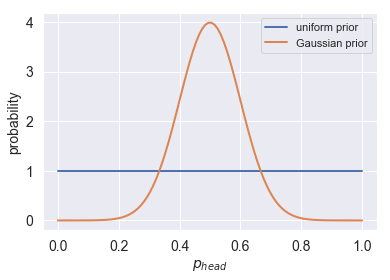

In [2]:
# specify the possible range of values for p_head (i.e. from 0 to 1)
p_heads = np.linspace(0,1,100)

# use scipy's built in uniform
uniform_pdf = stats.uniform.pdf(p_heads)

# use scipy's built in normal pdf to get gaussian pdf
gaussian_pdf = stats.norm.pdf(p_heads, loc=0.5, scale=0.1)

# plot uniform prior
plt.plot(p_heads, uniform_pdf)

# plot gaussian prior
plt.plot(p_heads, gaussian_pdf) 

plt.xlabel('$p_{head}$')
plt.ylabel('probability')
plt.legend(['uniform prior','Gaussian prior']);

## Creating the "data"

Now that we have specified our priors, we can conduct the "experiment," where we will flip a coin `n_flips` times and see how many heads we get. To simulate coin flips, we will once again be using `numpy`'s `random.uniform()` function.

In [3]:
# number of coin flips to be done
n_flips = 10

# probability of getting a head
p_head = 0.5

# conduct the flips
flips = np.random.uniform(size=n_flips)

# count the number of heads
n_heads = sum(flips < p_head)

# diplay number of heads
print(n_heads)

4


## Calculating the likelihood

With our data (the number of heads we got), we can now compute the likelihood of $P(n_\text{heads} \ | \ 10 \ \text{flips}, \  p_{head})$. This is given by the binomial distribution,

$$ P(k \ | \ n,p) =  \left( \begin{array} { l } { n } \\ { k } \end{array} \right) p ^ { k } ( 1 - p ) ^ { n - k }, \tag{4}$$

where $k$ is the number of heads, $n$ is the number of flips, and $p$ is the probability of heads. We can calculate the likelihood by calling `scipy`'s bulit-in binomial probability mass function for all possible values of `p_heads` (from $0$ to $1$).

In [4]:
likelihood = stats.binom.pmf(n_heads, n_flips, p_heads)

## Calculating the posterior probability

Now that we've specified the likelihood, we can get the posterior probability from just multiplying our priors by our likelihood. 

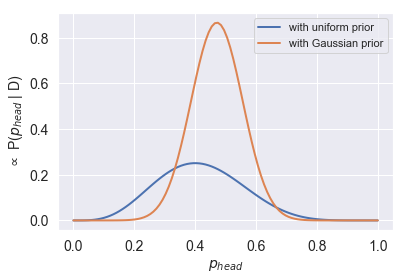

In [5]:
# calculate the posterior probabilities from likelihood and priors
posterior_uniformed = likelihood * uniform_pdf
posterior_informed = likelihood * gaussian_pdf

# plot the posterior probabilities
plt.plot(p_heads, posterior_uniformed)
plt.plot(p_heads, posterior_informed)
plt.xlabel('$p_{head}$')
plt.ylabel('$\propto$ P($p_{head}$ | D)')
plt.legend(['with uniform prior','with Gaussian prior'])

From these posterior probabilities, we can note some interesting differences depending on which prior we used. We see the posterior probability when we used a Gaussian prior remains largely unperturbed from $p_{head}=0.5$. This makes sense. If I actually gave you a real quarter and you got $4$ out of $10$ heads, a reasonable interpretation would be that you just got "unlucky" with your 4 heads and not that the coin is actually biased. However, when we used a uniform prior, the posterior probability takes on $0.4$ as the most probable value of $p_{head}$ since we have no other information to convince us otherwise. This illustrates the value of mathematically encoding what we already know as a prior as a way to inform how we interpret our data.

## Behavior as the number of coin flips increases

Using the code below, we can run it for varying values of `n_flips` and `p_head`, and watch as the posterior probability tightens up around the "true" value of $p_{head}$ as we increase the number of coin flips. This illustrates that provided enough data, we can overwhelm the effect of our specified prior. 

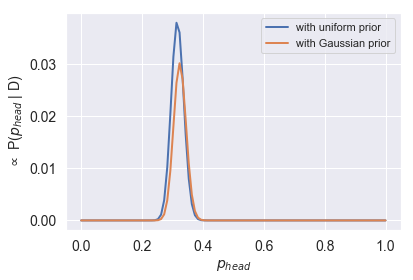

In [6]:
# number of coin flips to be done
n_flips = 500
p_head = 0.3
flips = np.random.uniform(size=n_flips)
n_heads = sum(flips < p_head)

# calculate the likelihood from binomial distribution 
likelihood = stats.binom.pmf(n_heads, n_flips, p_heads)

# calculate the posteriors and normalize 
posterior_uninformed = likelihood * uniform_pdf
posterior_informed = likelihood * gaussian_pdf

# plot the posterior probabilities
plt.plot(p_heads, posterior_uninformed)
plt.plot(p_heads, posterior_informed)
plt.xlabel('$p_{head}$')
plt.ylabel('$\propto$ P($p_{head}$ | D)')
plt.legend(['with uniform prior','with Gaussian prior']);